### Objective
- In this project, we will learn **basic steps in Machine Learning for regression task**. We are not focusing on evaluation metrics and cross validation in this time.
- The explainations for both of python source code and what we can interpret from plots are written through the project.
- Importing python packages are not written at only the beginning of source code. I will write it when it is needed so that you will understand which python packages are related to current tasks.
- We will do feature selection by "Filter Method" compare the results of feature selection 

### Steps to work on this project
1. Read and take a look at the data
2. Pre-processing by checking the data and cleanup
    - Missing values
    - Duplicate columns
    
    
3. Visualization <br>
    - See the correlations of features and target output by heatmap and scatter plot
    - We will do a bit **Filter based method** for feature selection to understand how it works.
        - Variance Threshold
        - Correlation Threshold
        - Univariate feature selection
    
   
4. Model building: <br>
    - Standardization (check interaction and polynomial terms)
    - Split train test
    - Model fitting
    
    
5. Test model (use simple metrics for continuous varible)
    - Mean Absolute Error
        Mean Absolute Error (MAE): <br>
        It is the average over the difference between prediction and actual observation.
    - Mean Squared Error <br>
        It is the average over the squared difference between prediction and actual observation.
    - Root Mean Square Error <br>
        It is the error rate by the square root of MSE.  RMSE has the benefit of penalizing large errors.
        

### About the dataset

Let's take a look at the file named ***housing.names*** for the attribute information <br>

**Attribute Information:**

**Input**
1. ***CRIM***      per capita crime rate by town
2. ***ZN***        proportion of residential land zoned for lots over 25,000 sq.ft.
3. ***INDUS***     proportion of non-retail business acres per town
4. ***CHAS***     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. ***NOX***       nitric oxides concentration (parts per 10 million)
6. ***RM***        average number of rooms per dwelling
7. ***AGE***       proportion of owner-occupied units built prior to 1940
8. ***DIS***       weighted distances to five Boston employment centres
9. ***RAD***       index of accessibility to radial highways
10. ***TAX***      full-value property-tax rate per \$10,000
11. ***PTRATIO***  pupil-teacher ratio by town
12. ***B***        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. ***LSTAT***    \% lower status of the population


**Output**
14. ***MEDV***     Median value of owner-occupied homes in $1000's 


**Task** <br>
We will build regressor for predicting house price. 

### <font color="blue">Read and take a look at data </font>
<font color="blue">
    Since the dataset is boston housing which is included in sklearn, we can load dataset from the package or read from local file. I will how to load from sklearn first then we will load data from local file so that you will understand how to use pandas when working on other datasets. </font>

In [27]:
# Import pandas library, it is very useful for managing dataset.
import pandas as pd

# Load boston housing dataset.
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# Check the keys that we can use to refer to the data e.g data, target, feature_names etc.
print("keys for refering to data: ", boston_dataset.keys())

# Form the dataset to pandas dataframe 
df_boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

print("Features")
display(df_boston.head())
print("Target output")
display(boston_dataset.target)

keys for refering to data:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Target output


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

<font color="blue">Let's load data from local file</font>

In [32]:
df = pd.read_csv('housing.data') 
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


<font color="blue">We can see that all columns are grouped into 1 column, so we need to check our data file how it looks like... <br>

Oh! we see that the columns are separated by whitespace. Furthermore, the data file does not have column name. <br>
To fix the problem, let's read the data file again by specifying a separator and set column names.<br>
See [read_csv spec](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html "read_csv")
</font>


In [33]:
boston_cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv('housing.data', delim_whitespace=True, header=None, names = boston_cols) 
df.head()

# Note: another way of adding column is to add to the dataframe
# df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MDEV']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<font color="blue">OK, now the data is ready for next process. <br>
    Let's do our basic data analysis</font>

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<font color="blue">From above result, there is no missing value as all columns say 'non-null' and data types are numerical (float64, int64) as we've expected. We're good to go next!. <br>
Let's check data in statistical term.
</font>

In [36]:
df.describe()
# 25, 50, 75 are the values of percentile

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## <font color="blue">Data Visualization and Feature Selection (Filter Method) </font>
<font color="blue">We will see the correlation of attributes by heatmap and scatter plots then analyze result (filter method)</font>

In [53]:
# Check if there is a column that contain the same value in all observations.

from sklearn.feature_selection import VarianceThreshold
# Feature selector that removes all low-variance features.
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit_transform(df)
print("Variance: ", constant_filter.variances_)
print("Threshold: ", constant_filter.threshold)
# Check the variance 
constant_col_idx = [i for i in range(0,len(constant_filter.variances_)) if constant_filter.variances_[i] == 0]
print("Index of constant columns: ", constant_col_idx)


Variance:  [7.38403597e+01 5.42861840e+02 4.69714297e+01 6.43854770e-02
 1.34010989e-02 4.92695216e-01 7.90792473e+02 4.42525226e+00
 7.56665313e+01 2.83486236e+04 4.67772630e+00 8.31828042e+03
 5.08939794e+01 8.44195562e+01]
Threshold:  0
Index of constant columns:  []


<font color="blue">There is no constant column. <br>
Let's check the correlations. <br>
We will call .corr() to calculate correlation metric. By default, the calculation method is 'pearson' which measures linear correlation between two variables.
</font>

In [56]:
# Get correlation metrix
cor_matrix = df.corr()

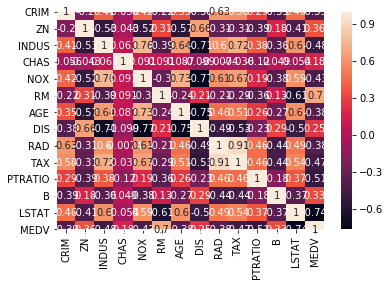

In [57]:
# Show heatmap
import seaborn as sns
# add annot = True, to print the values inside the square
ax = sns.heatmap(cor_matrix, annot = True)

<font color="blue">Oops! the plot does not look so good. Let's fix the figure size</font>

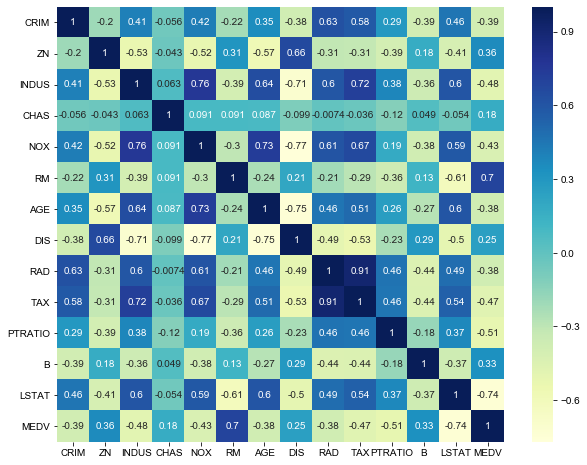

In [58]:
import matplotlib.pyplot as plt

# Set figure size (width, height), color can be set through 'cmap' parameter.
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(cor_matrix, annot = True, cmap="YlGnBu")

# Fix half cut for first and last row
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.set() # reset to default setting

<font color="blue"> 
Wow, the heatmap looks pretty much better!. <br>
Let's me explain what we should see from above heatmap. <br> 
- Correlation between featurs and target output (univariate feature selection)
- Correlation among features (to detect and remove redundant features) 
- Positive and negative correlation between the features.
    
First, let's take a look at row **MEDV** (the last row) which is our output to see if there is any feature that highly correlated with target output.
</font>

<font color="blue"> We will set a threshold for printing the features that the correlations are over the threshold </font>

In [60]:
# Correlation with threshold
threshold_corr = 0.5

# Get absolute correlations of column MEDV 
cor_to_target = abs(cor_matrix["MEDV"])

# Filter the correlations that higher than threshold
relevant_features = cor_to_target[cor_to_target > threshold_corr]
print(relevant_features)

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


<font color="blue"> 
Now we see that **RM**, **PTRATIO**,  and **LSTAT** are highly correlated to the target output **MEDV**. <br>
For the correlation of its own feature, it always be 1. <br>
    
**What do we know from this?**
- The correlation between LSTAT and MEDV is -0.74 (negative correlation) which means the house price is higher when LSTAT is lower whist the correlation between RM and MEDV is 0.7 (positive correlation) which means when number of rooms is higher the price is higher too.
<br><br>
The drawback of only doing univariate feature selection is that there could be redundant features (the features that can be representative of each other because they go in the same direction). <br>

In order to detect and remove redundant features, let's do more analysis by starting from our interest features.
</font>

In [61]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["LSTAT","RM"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
          LSTAT        RM
LSTAT  1.000000 -0.613808
RM    -0.613808  1.000000


<font color="blue"> Well..the correlation between RM and LSTAT is quite high. <br>
We can consider to drop **RM** as it's a redundant feature and it has lower correlation than **LSTAT** to the target output **MEDV**. <br>

**Up until now, we can summarize 2 points** <br>
1. The most highly correlated features to the target output are LSTAT and RM.
2. If we drop redundant features, the interest features are LSTAT and PTRATIO.
We will do trial and error for these feature sets later!.<br><br>
    
It is also interesting to see all redundant features in our dataset. <br>
Let's write code for filtering them.
</font>

In [194]:
# Array to keep value for redundant feature
arr_col_over_threshold = []

# We do the loop through all columns in the correlation matrix 
# and filter the row that the correlation is higher than threshold.

col_end_range = cor_matrix.shape[0] - 1
# print(col_end_range)
for cor_matrix_idx in range(0, col_end_range):
    
    current_col_name = cor_matrix.columns.values[cor_matrix_idx]
    cor_cols = cor_matrix.iloc[:, cor_matrix_idx]
    print("Redundant features with ",cor_matrix.index.values[cor_matrix_idx], ">>>")
    for row_idx in range(0, col_end_range):
        current_row_name = cor_matrix.index.values[row_idx]
        if current_col_name != current_row_name \
            and abs(cor_cols[row_idx]) > threshold_corr:
            print(current_col_name, ":", current_row_name, cor_cols[row_idx])

Redundant features with  CRIM >>>
CRIM : RAD 0.6255051452626011
CRIM : TAX 0.5827643120325846
Redundant features with  ZN >>>
ZN : INDUS -0.5338281863044747
ZN : NOX -0.5166037078279853
ZN : AGE -0.5695373420992127
ZN : DIS 0.6644082227621132
Redundant features with  INDUS >>>
INDUS : ZN -0.5338281863044747
INDUS : NOX 0.7636514469209145
INDUS : AGE 0.644778511355255
INDUS : DIS -0.7080269887427683
INDUS : RAD 0.5951292746038486
INDUS : TAX 0.7207601799515441
INDUS : LSTAT 0.6037997164766213
Redundant features with  CHAS >>>
Redundant features with  NOX >>>
NOX : ZN -0.5166037078279853
NOX : INDUS 0.7636514469209145
NOX : AGE 0.7314701037859579
NOX : DIS -0.7692301132258261
NOX : RAD 0.6114405634855754
NOX : TAX 0.6680232004030201
NOX : LSTAT 0.5908789208808449
Redundant features with  RM >>>
RM : LSTAT -0.6138082718663957
Redundant features with  AGE >>>
AGE : ZN -0.5695373420992127
AGE : INDUS 0.644778511355255
AGE : NOX 0.7314701037859579
AGE : DIS -0.7478805408686316
AGE : TAX 0.50

<font color="blue"> 
Next, let's see the pattern of data by using pairplot.
</font>

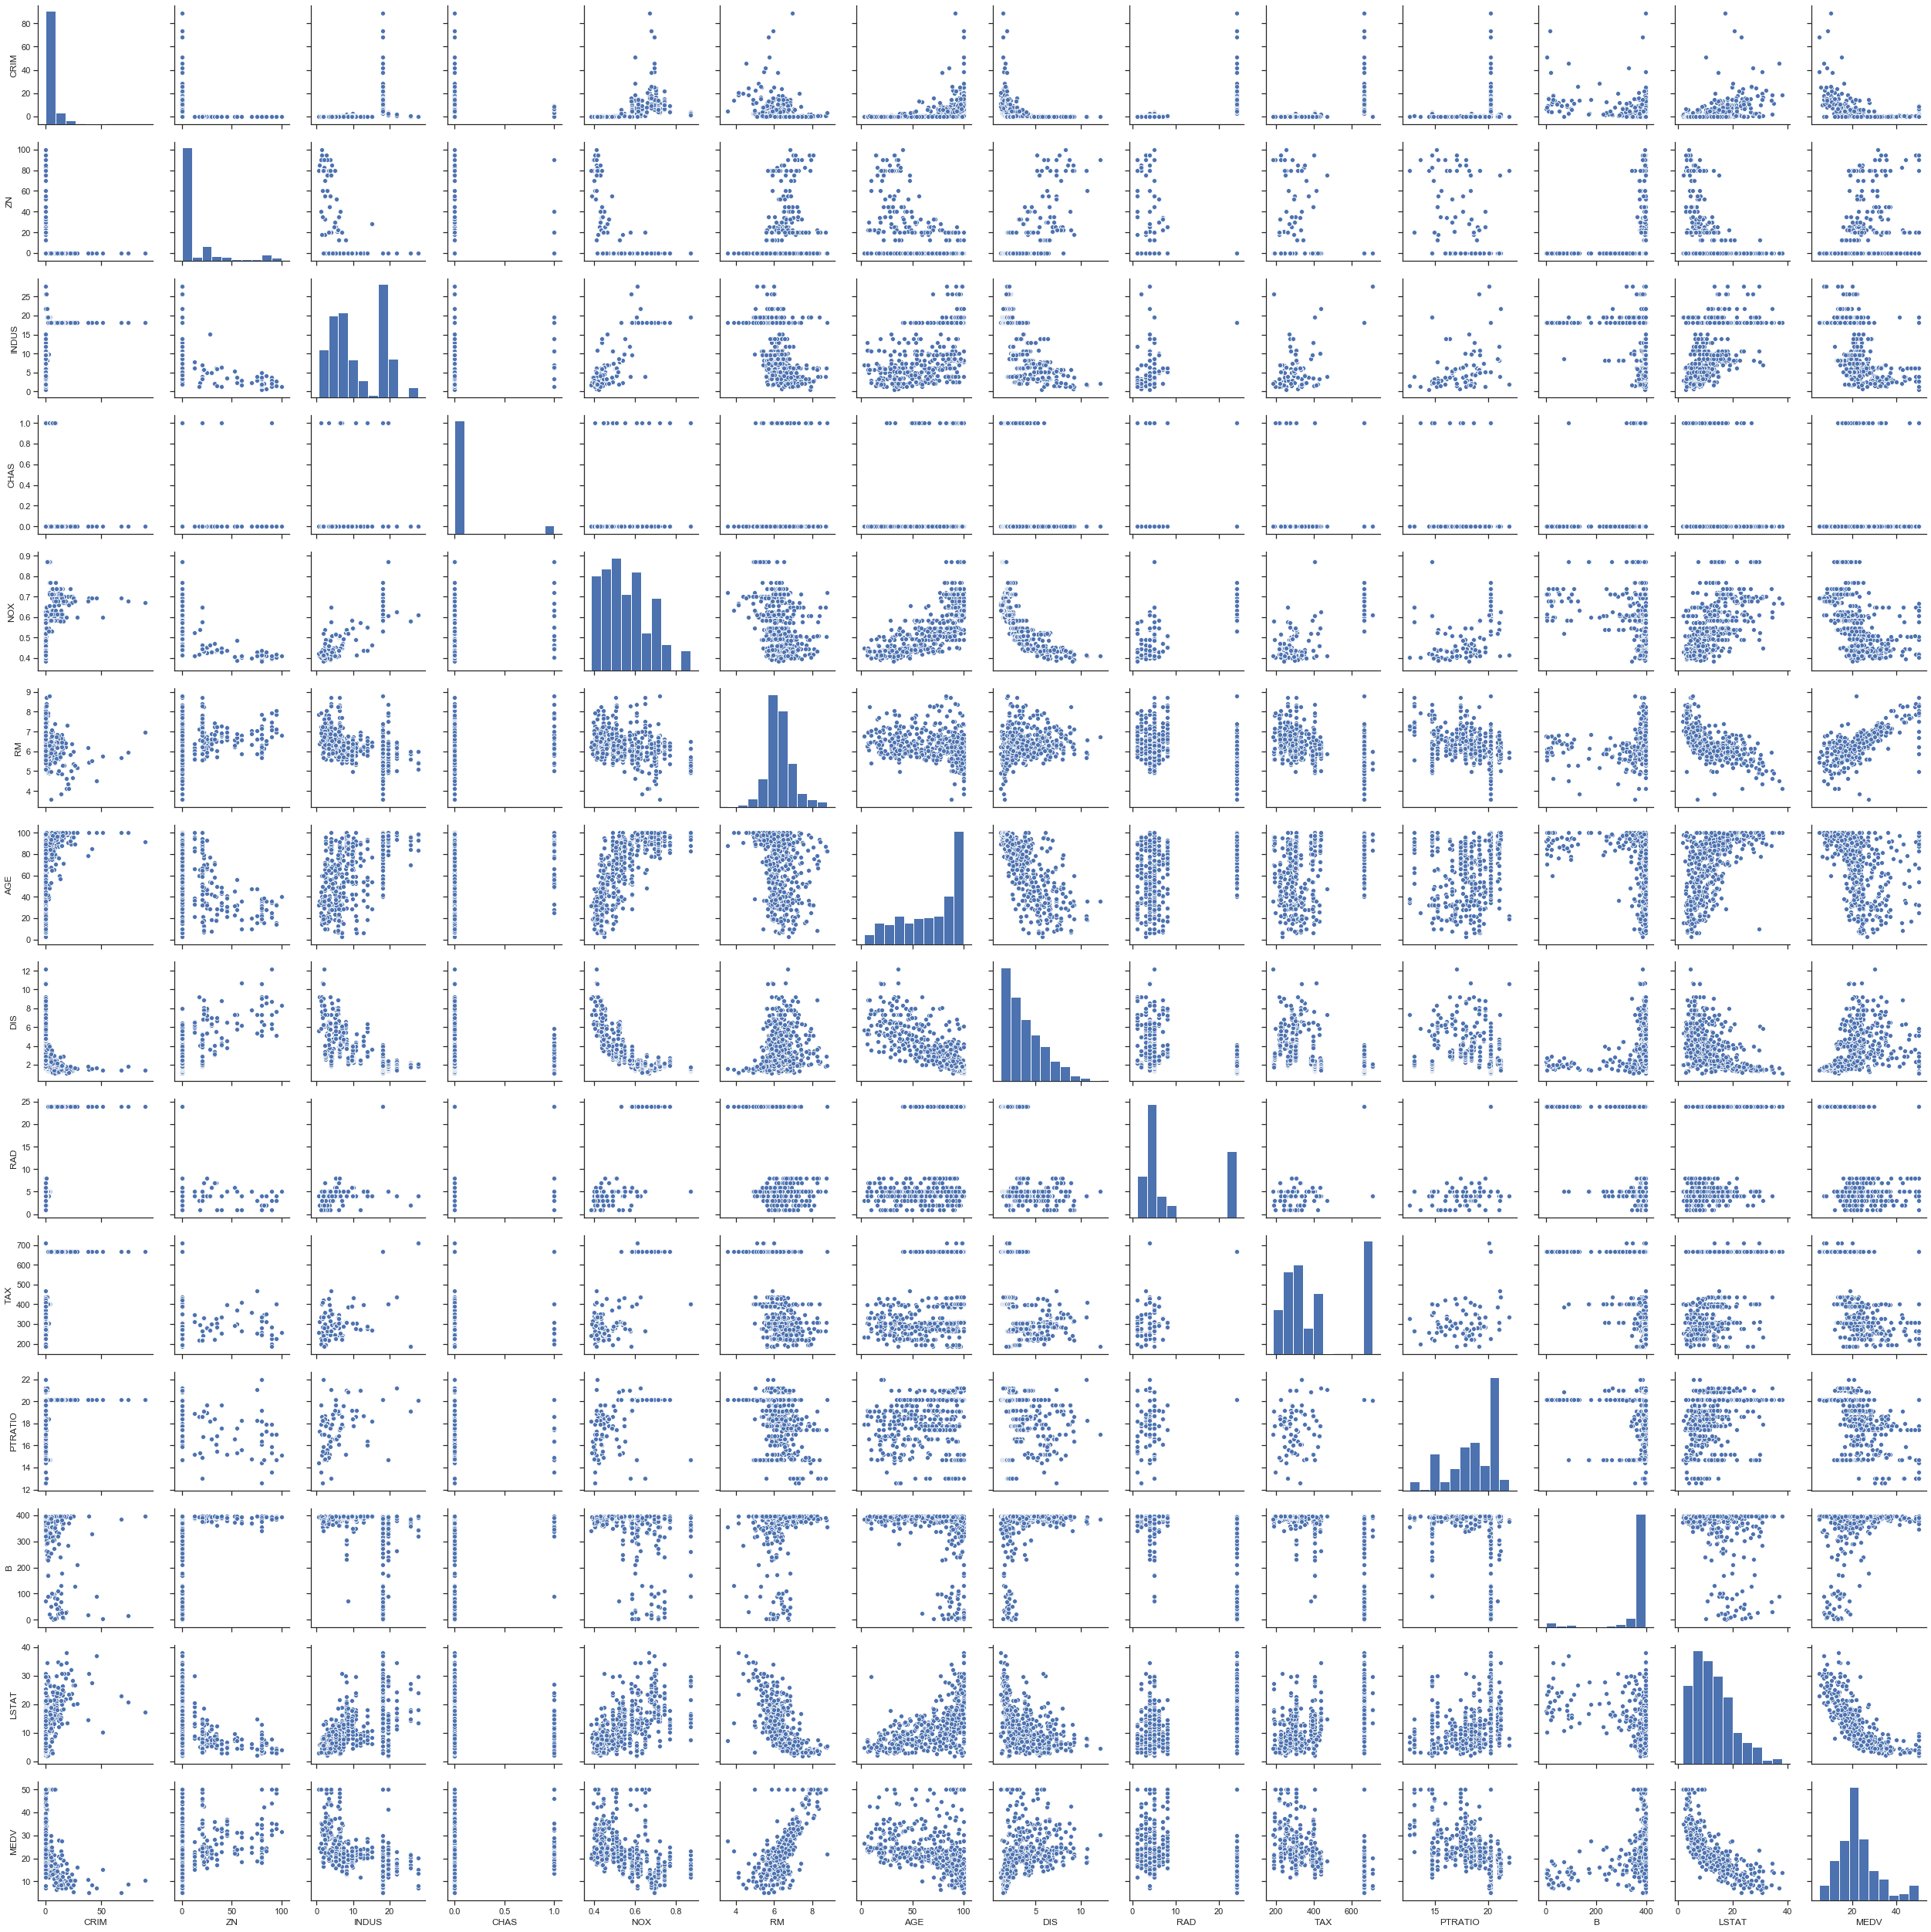

In [102]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
sns.set()

<font color="blue"> 
Try with some features 
</font>

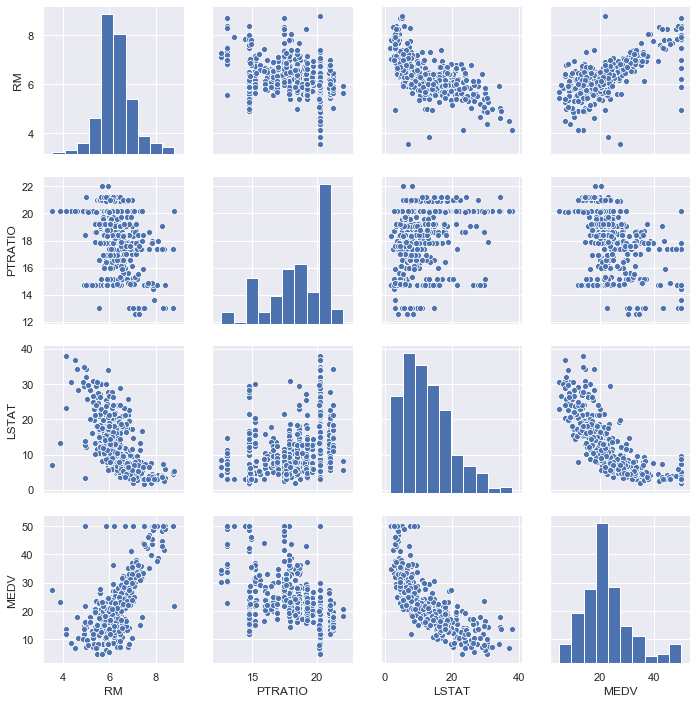

In [64]:
sns.pairplot(df, vars=['RM', 'PTRATIO', 'LSTAT', 'MEDV']);

<font color="blue"> 
Play a bit more with another style...
</font>

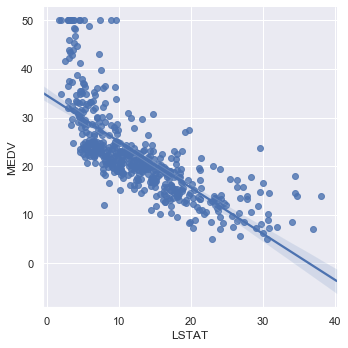

In [209]:
sns.lmplot(x='LSTAT',y='MEDV',data=df)

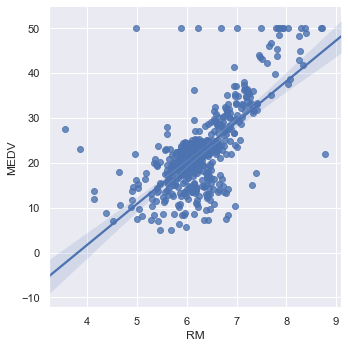

In [210]:
sns.lmplot(x='RM',y='MEDV',data=df)

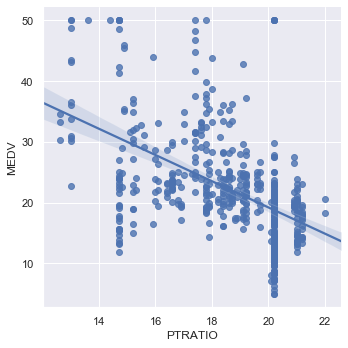

In [213]:
sns.lmplot(x='PTRATIO',y='MEDV',data=df)

<font color="blue"> 
From pairplot, it's clear that **RM has a linear relationship with MEDV** but LSTAT is not really linear...and the correlations between other features and MDEV are hard to capture the pattern. <br>
    
Let's try modelling without feature selection and try with feature selection later.
</font>

## <font color="blue"> Prepare input and output data </font>
<font color="blue">
    - Prepare df_input for features and df_output for target variable.
    - Save input and output to CSV files for further use.
</font>

In [65]:
df_input = df.iloc[:, 0:13]
df_input.to_csv("input.csv", index=False)
df_input.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [66]:
df_output = df[['MEDV']]
df_output.to_csv("output.csv",index=False)
df_output.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


<font color="blue"> 
**Standardize input data** <br>
    The dataset should be standardized or not, it is still problematic discussion.
    We should consider case by case with the requirement of our algorithm. The stardization will directly impact to the coefficent (weight) of each feature and the meaning. <br>
    
Let's try standardize data...

In [67]:
# Standardize input data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Please check default setting to learn more.

# Fit and transform data
X = df_input.values
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


<font color="blue"> 
**Split dataset to training set and test set** <br>
- Set ratio for spliting dataset to training set and test set.
- Proportion between train and test data can be considered from number of samples.
    - Rule of thumbs are 0.2 (80:20), 0.25 (75:25) or 0.33 <br>

In this practice, we won't do cross validation by splitting training data again to train and validation set. Therefore, let's use 0.25
</font>

In [69]:
from sklearn.model_selection import train_test_split

# Consider to change the ratio later and see how the result has changed.
test_ratio = 0.25 

# The data will be shuffled by default
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_output, test_size=test_ratio, random_state=42)

print("Training data: ", X_train.shape, y_train.shape, " Testing data: ", X_test.shape, y_test.shape)
# print(X_train, "\n")
# print(X_test, "\n")
# print(y_train, "\n")
# print(y_test.head())

Training data:  (379, 13) (379, 1)  Testing data:  (127, 13) (127, 1)


## <font color="blue"> Model building</font>
<font color="blue"> 
**Fit data with selected algorithm (LinearRegression)** <br>
Please note that LinearRegression may be not the best algorithms for this data but it is one an easy algorithm to start learning Machine Learning with regression task. As in Machine Learning, it is trial and error to select the best model. Please try other algorithms to learn more. ^^ <br>
</font>

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

# Training
# Init regressor
reg = LinearRegression() # See default setting for more understanding

# Fit the training dataset
reg.fit(X_train, y_train)

# Testing
# Use test set for testing
y_pred = reg.predict(X_test)

# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print("intercept: ", reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_.ravel(), df_input.columns.values , columns=['Coefficient'])  
display(coeff_df.T)

Mean Absolute Error: 3.0609395954370267
Mean Squared Error: 22.09869482709788
Root Mean Squared Error: 4.70092489060375
intercept:  [22.45552359]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Coefficient,-1.102682,0.688539,0.334859,0.703757,-1.879857,3.066527,-0.260066,-2.946903,2.242175,-1.676456,-1.996535,1.202571,-3.692841


<font color="blue"> 
**Let's try with the selected features from Filter Method.**
- PTRATIO
- LSAT
</font>

In [72]:
# Select only interested columns
cols = ['PTRATIO', 'LSTAT']
sel_col_idx = [df_input.columns.get_loc(c) for c in cols if c in df]
X_train2 = X_train[:, sel_col_idx]
X_test2 = X_test[:, sel_col_idx]
print(X_train2.shape)

# Training
reg2 = LinearRegression()
reg2.fit(X_train2, y_train)

# Testing
y_pred2 = reg2.predict(X_test2)

# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))  
print("intercept: ", reg2.intercept_)
coeff_df2 = pd.DataFrame(reg2.coef_.ravel(), cols , columns=['Coefficient'])  
display(coeff_df2.T)

(379, 2)
Mean Absolute Error: 3.862778471003489
Mean Squared Error: 29.121889178995907
Root Mean Squared Error: 5.396470066533855
intercept:  [22.58572731]


,PTRATIO,LSTAT
Coefficient,-2.277083,-6.144475


<font color="blue"> 
**Let's try with the selected features from Filter Method.**
- RM
- LSAT
</font>

In [73]:
# Select only interested columns
cols = ['RM', 'LSTAT']
sel_col_idx = [df_input.columns.get_loc(c) for c in cols if c in df]
X_train3 = X_train[:, sel_col_idx]
X_test3 = X_test[:, sel_col_idx]
print(X_train3.shape)

# Training
reg3 = LinearRegression()
reg3.fit(X_train3, y_train)

# Testing
y_pred3 = reg3.predict(X_test3)

# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))  
print("intercept: ", reg3.intercept_)
coeff_df3 = pd.DataFrame(reg3.coef_.ravel(), cols , columns=['Coefficient'])  
display(coeff_df3.T)

(379, 2)
Mean Absolute Error: 3.957262553537191
Mean Squared Error: 29.54566467337792
Root Mean Squared Error: 5.435592393969394
intercept:  [22.61233323]


,RM,LSTAT
Coefficient,3.70138,-4.627383


<font color="blue"> 
**What if we select only the highest correlated feature to the target output**
- LSTAT
</font>

In [74]:
cols = ['LSTAT']
sel_col_idx = [df_input.columns.get_loc(c) for c in cols if c in df]
X_train4 = X_train[:, sel_col_idx]
X_test4 = X_test[:, sel_col_idx]
print(X_train4.shape)

# Training
reg4 = LinearRegression()
reg4.fit(X_train4, y_train)

# Testing
y_pred4 = reg4.predict(X_test4)

# Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))  
print("intercept: ", reg4.intercept_)
print("Coef: ", reg4.coef_)

(379, 1)
Mean Absolute Error: 4.5560507624182005
Mean Squared Error: 35.50838282425952
Root Mean Squared Error: 5.958891073367554
intercept:  [22.77077313]
Coef:  [[-7.00013439]]


## <font color="blue"> Sum up </font> 
<font color="blue">Fitting all features give the best score and using only LSTAT gives the worse score but it does not mean that always use all features is a good solution. Computational expensive (consuming lots of resources) and model complexity are the things that we should take into account.<br>
    
In this dataset, it still contains outliers which affect to RMSE score.<br>
Doing dutlier detection, increasing number of samples would help us to produce better model.
</font>